In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [8]:
# Load the Australian Drug Sales dataset
# Converting date column to date type and reseting index 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [33]:
df.head(5)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 11.3 KB


In [116]:
# Checking data type of my df Stationary or not
# Using ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 3.145186
p-value: 1.000000


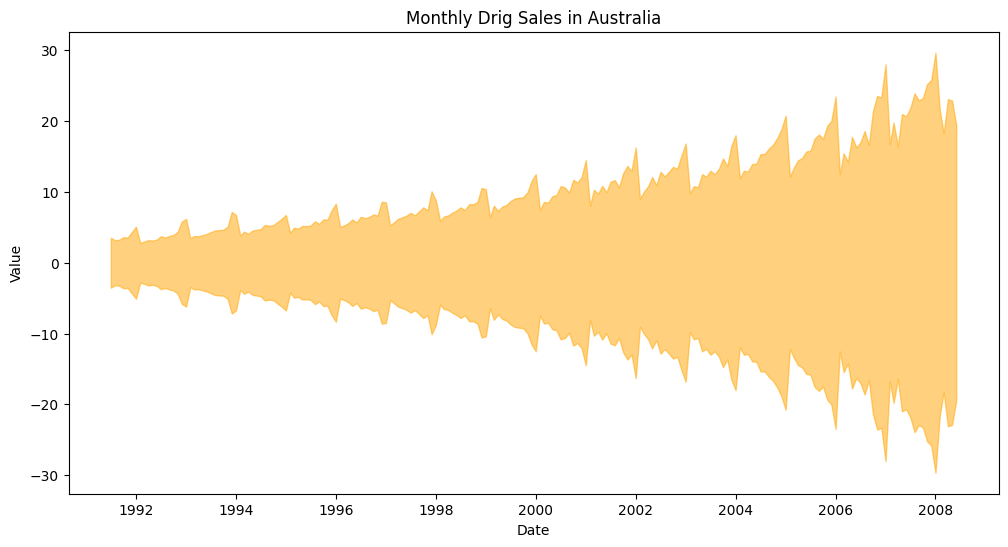

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(df, color='red')
ax.fill_between(df.index, df['value'], -df['value'], alpha=0.5, color='orange')
ax.set(ylabel='Value', xlabel='Date', title='Monthly Drig Sales in Australia')
plt.show()

In [26]:
# Draw Plot
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [39]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.month for d in df.index]
years = df['year'].unique()

In [44]:
np.random.seed(10)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

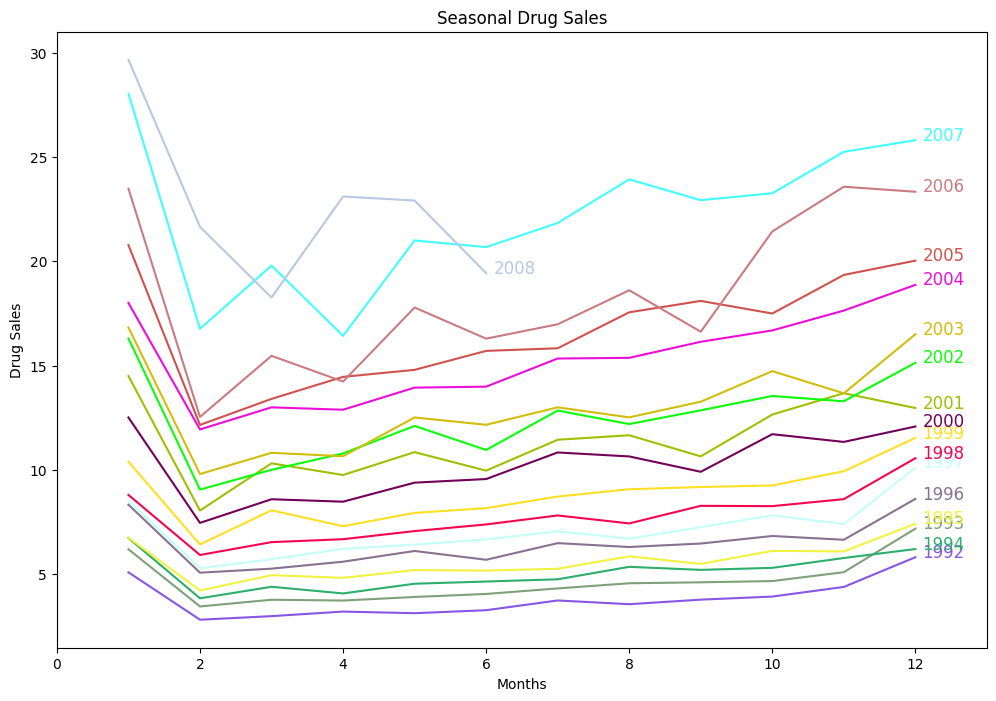

In [98]:
fig = plt.figure(figsize=(12,8))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]+.1, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
plt.gca().set(xlabel='Months', ylabel='Drug Sales', title='Seasonal Drug Sales', xlim=(0.0, len(df['month'].unique())+1))
plt.show()

In [114]:
df.loc[df.year==y, 'value'][-1:]

date
2008-06-01    19.43174
Name: value, dtype: float64